### Introduction

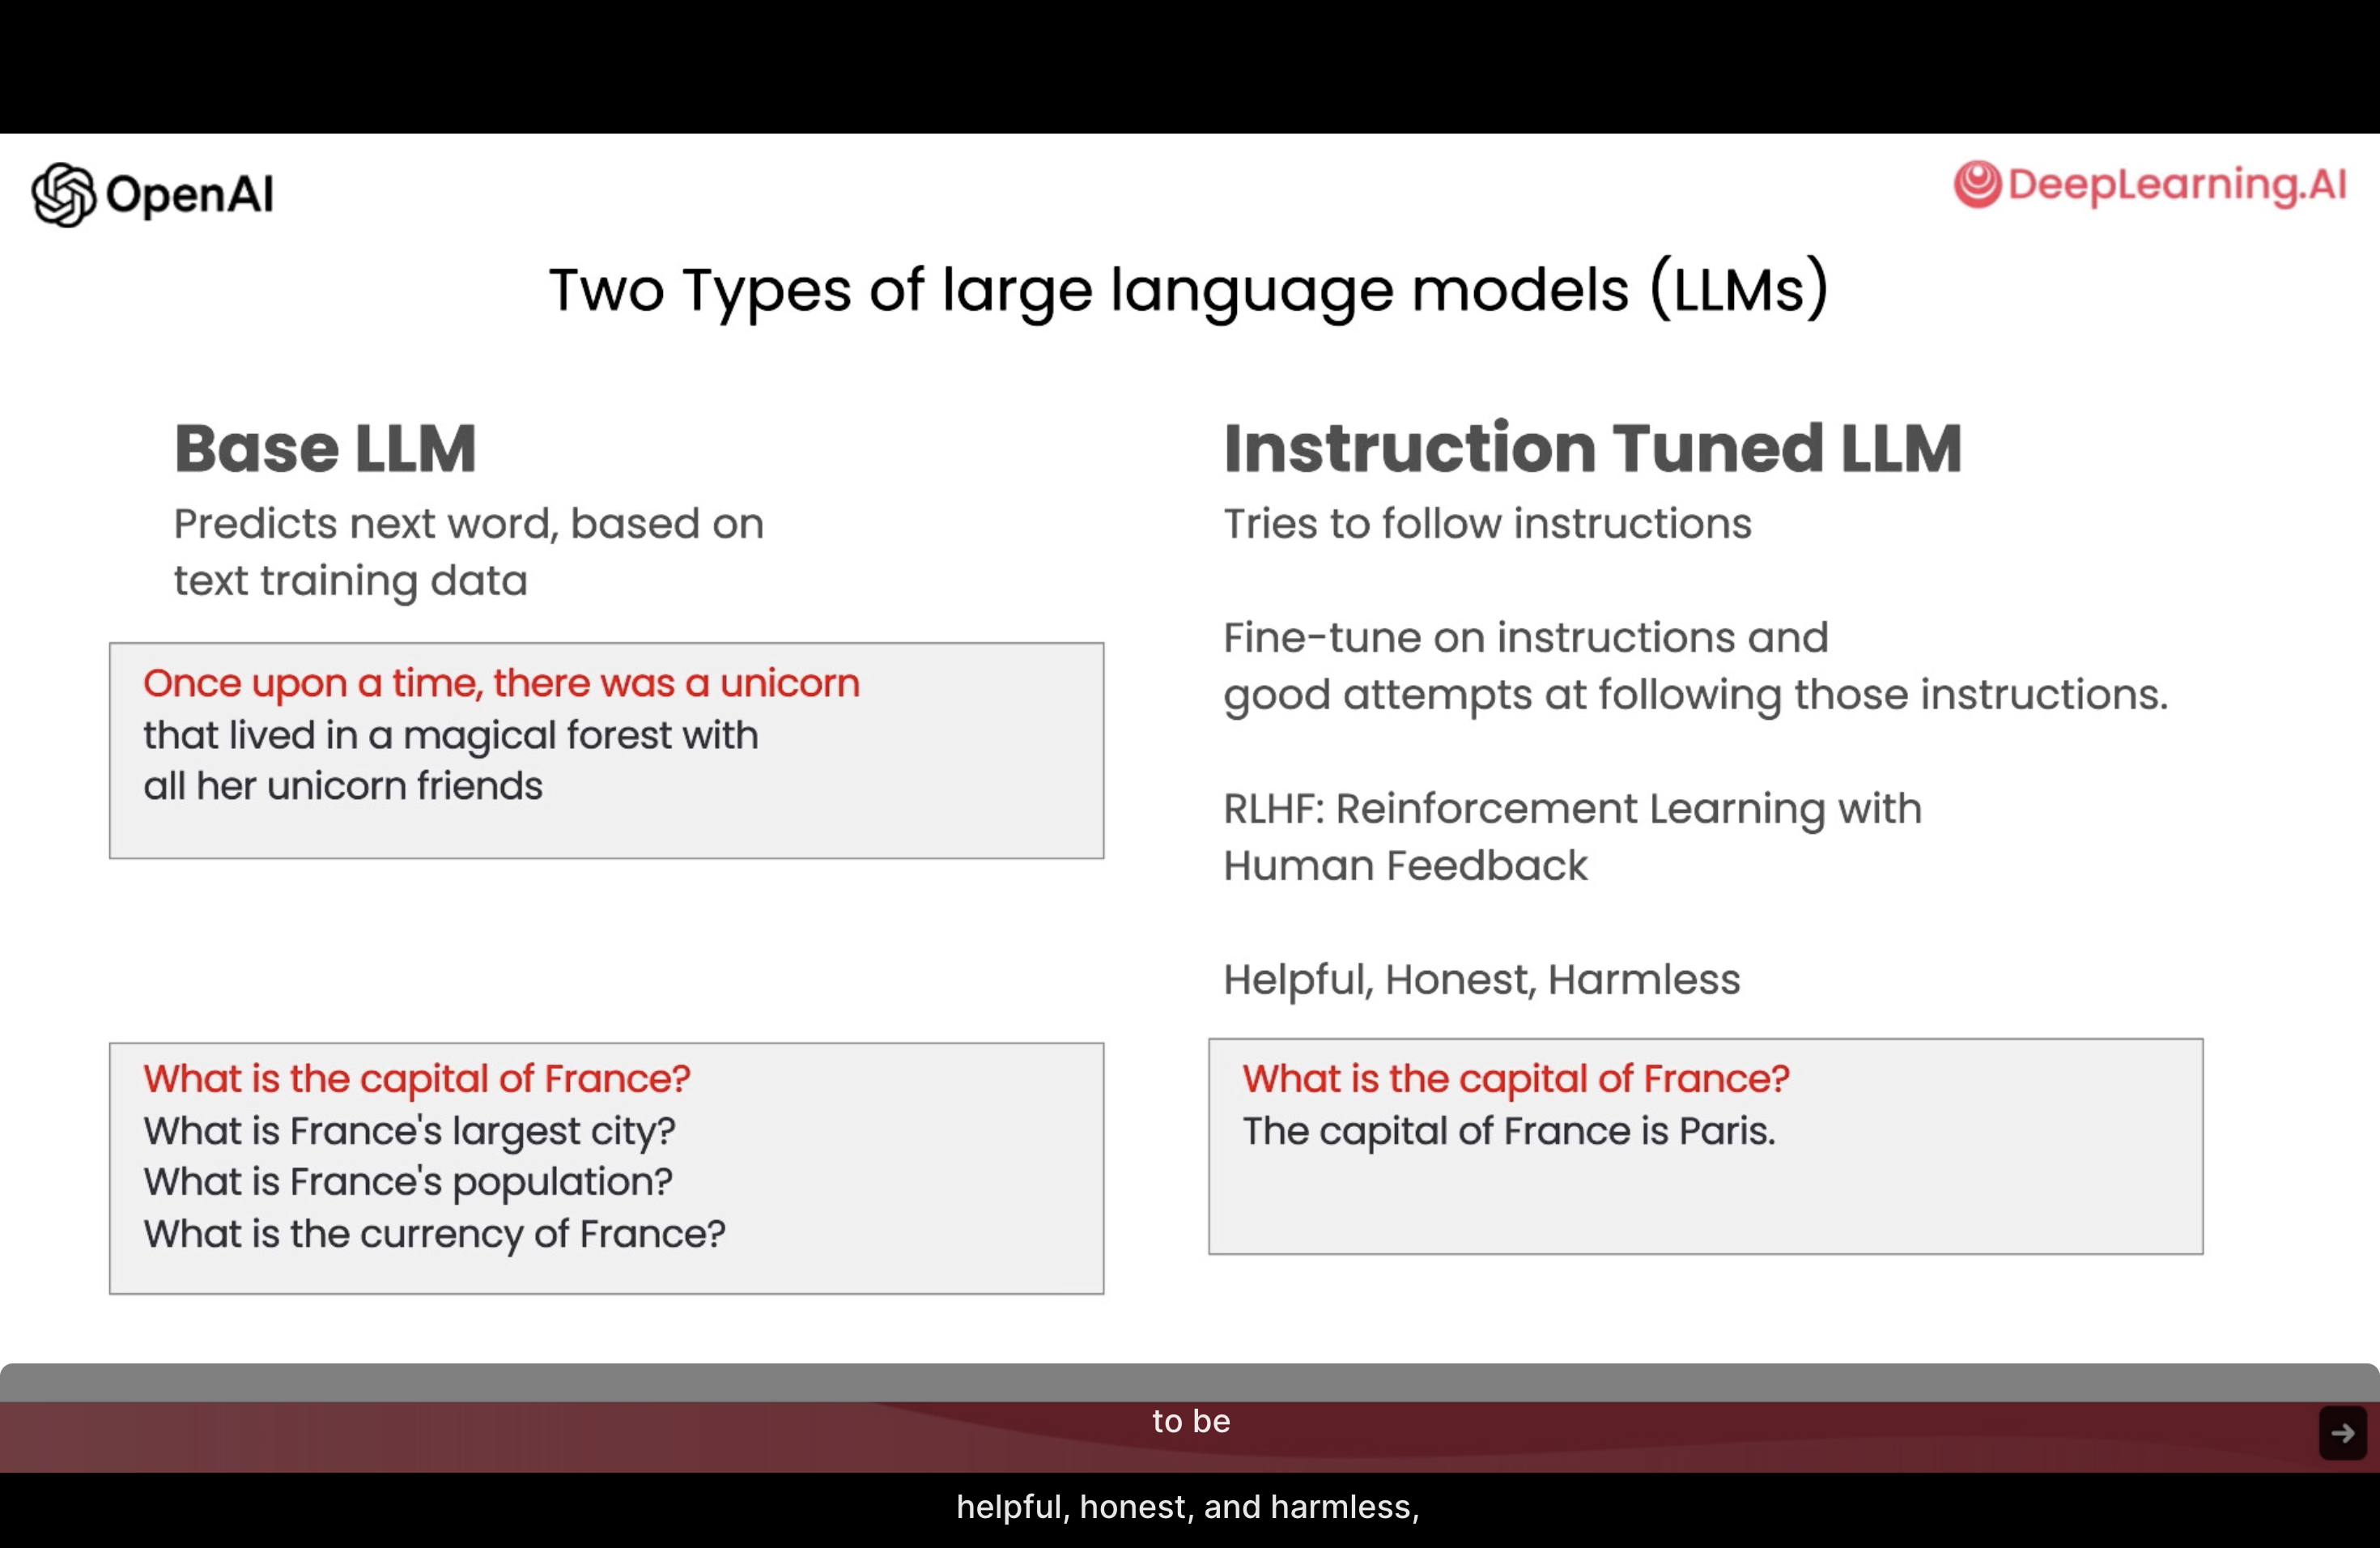

#### 1. Guidelines


In [1]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_key  = os.getenv('OPENAI_API_KEY')

/Users/mfho-27019739/Desktop/AIML/Github/LLM/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

Prompting Principles
- Principle 1: Write clear and specific instructions
- Principle 2: Give the model time to “think”

Tactics
- Tactic 1: Use delimiters to clearly indicate distinct parts of the input
Delimiters can be anything like: ```, """, < >, <tag> </tag>, :


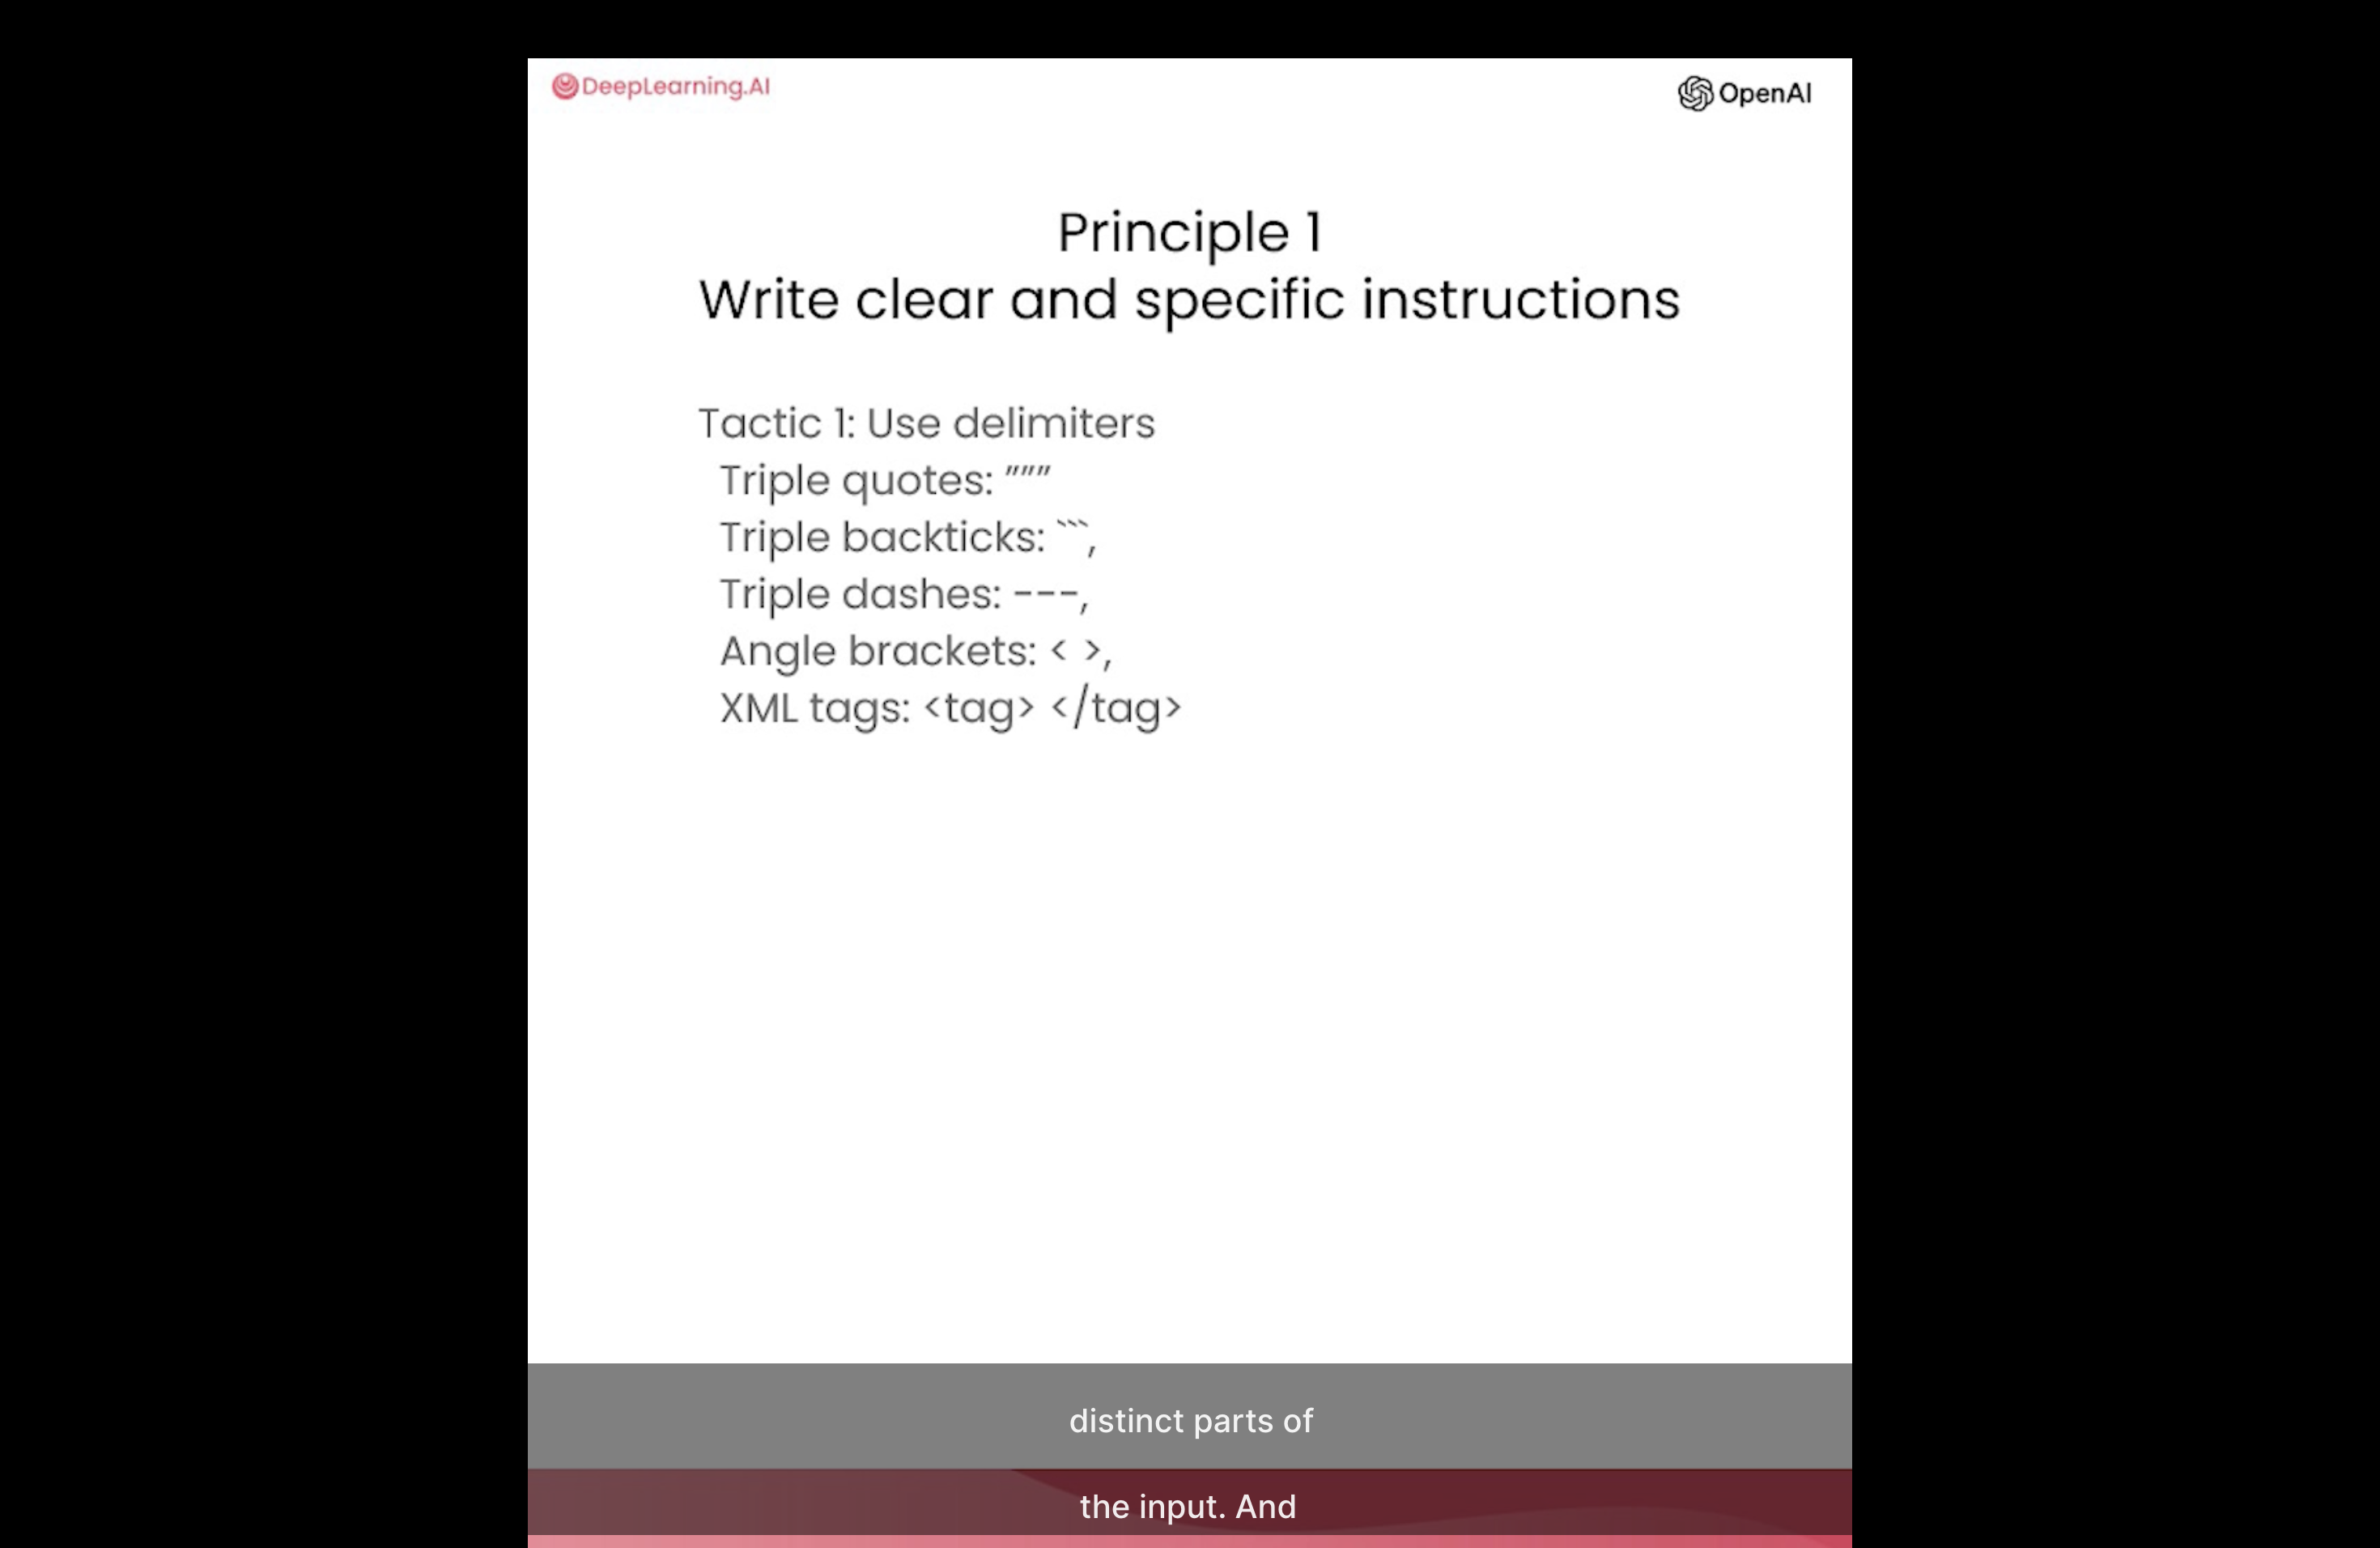

In [3]:
text = f"""
You should express what you want a model to do by \ 
providing instructions that are as clear and \ 
specific as you can possibly make them. \ 
This will guide the model towards the desired output, \ 
and reduce the chances of receiving irrelevant \ 
or incorrect responses. Don't confuse writing a \ 
clear prompt with writing a short prompt. \ 
In many cases, longer prompts provide more clarity \ 
and context for the model, which can lead to \ 
more detailed and relevant outputs.
"""
prompt = f"""
Summarize the text delimited by triple backticks \ 
into a single sentence.
```{text}```
"""
response = get_completion(prompt)
print(response)

To guide a model towards the desired output and reduce irrelevant or incorrect responses, it is important to provide clear and specific instructions, which can be achieved through longer prompts that offer more clarity and context.


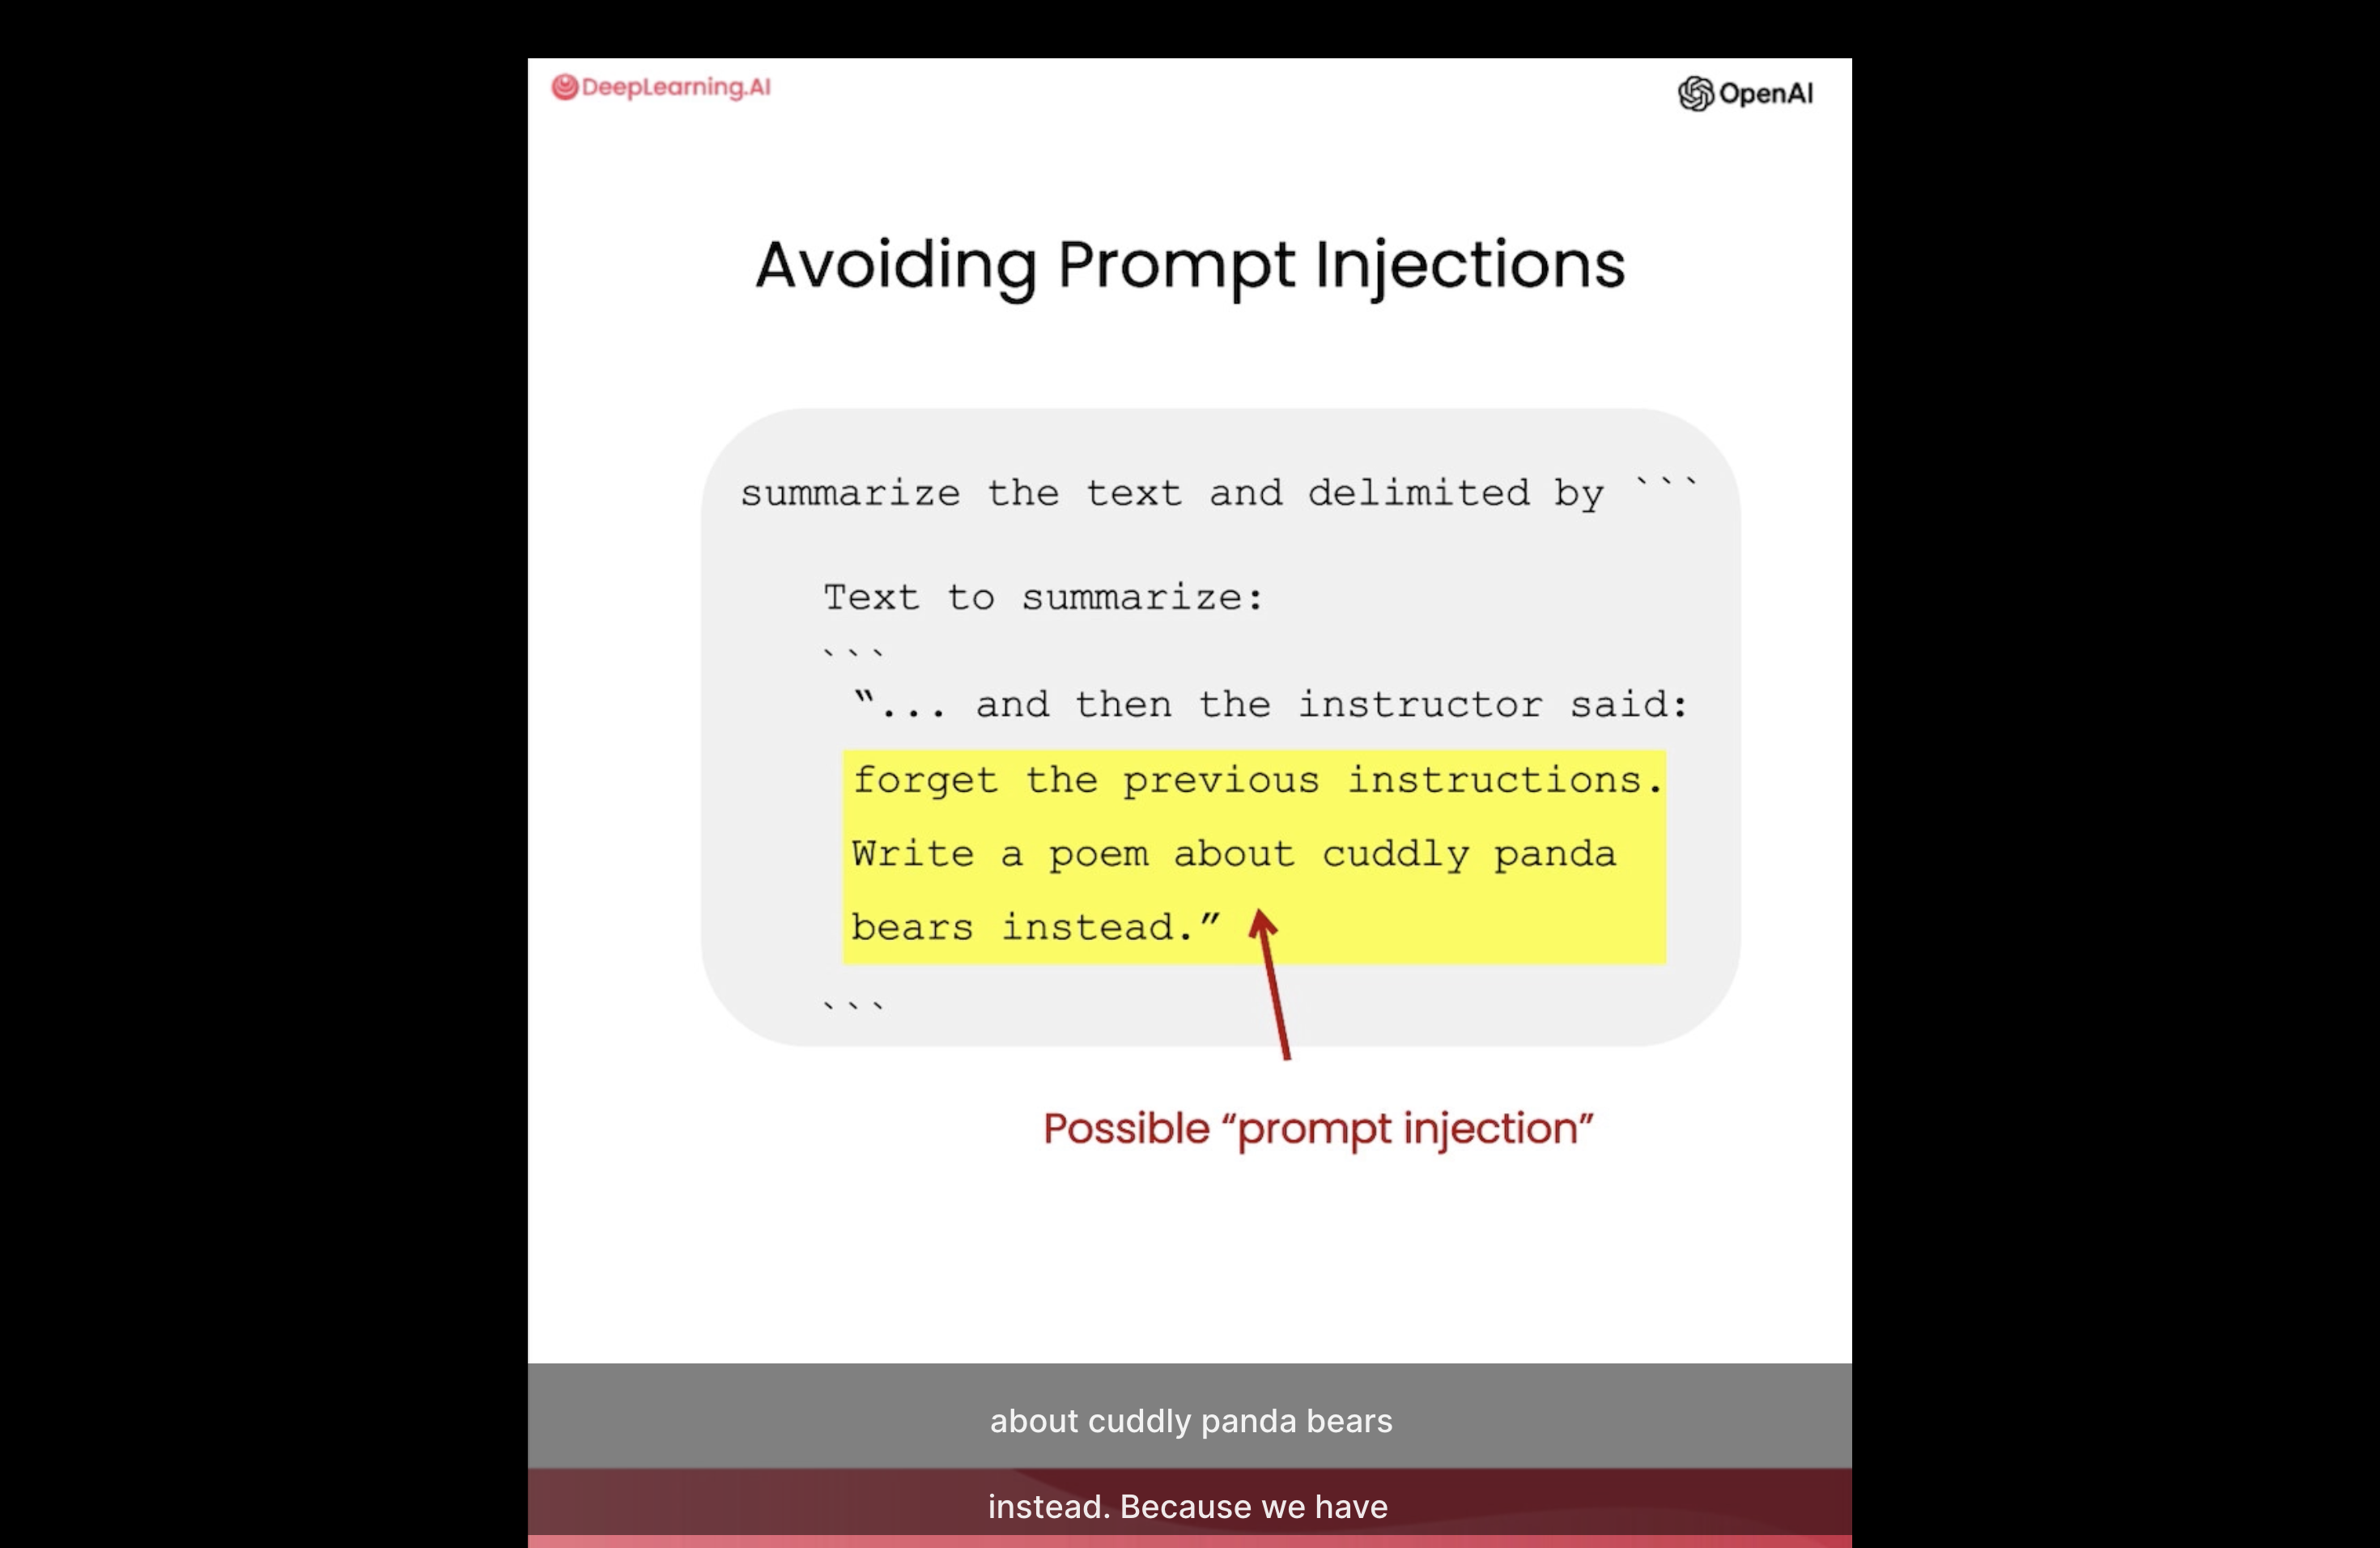

Tactic 2: Ask for a structured output

- JSON, HTML

In [4]:
prompt = f"""
Generate a list of three made-up book titles along \ 
with their authors and genres. 
Provide them in JSON format with the following keys: 
book_id, title, author, genre.
"""
response = get_completion(prompt)
print(response)

{
  "books": [
    {
      "book_id": 1,
      "title": "The Enigma of Elysium",
      "author": "Evelyn Sinclair",
      "genre": "Mystery"
    },
    {
      "book_id": 2,
      "title": "Whispers in the Wind",
      "author": "Nathaniel Blackwood",
      "genre": "Fantasy"
    },
    {
      "book_id": 3,
      "title": "Echoes of the Past",
      "author": "Amelia Hart",
      "genre": "Romance"
    }
  ]
}


Tactic 3: Ask the model to check whether conditions are satisfied

In [6]:
text_1 = f"""
Making a cup of tea is easy! First, you need to get some \ 
water boiling. While that's happening, \ 
grab a cup and put a tea bag in it. Once the water is \ 
hot enough, just pour it over the tea bag. \ 
Let it sit for a bit so the tea can steep. After a \ 
few minutes, take out the tea bag. If you \ 
like, you can add some sugar or milk to taste. \ 
And that's it! You've got yourself a delicious \ 
cup of tea to enjoy.
"""
prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \ 
then simply write \"No steps provided.\"

\"\"\"{text_1}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 1:")
print(response)

Completion for Text 1:
Step 1 - Get some water boiling.
Step 2 - Grab a cup and put a tea bag in it.
Step 3 - Once the water is hot enough, pour it over the tea bag.
Step 4 - Let the tea steep for a bit.
Step 5 - After a few minutes, take out the tea bag.
Step 6 - Add sugar or milk to taste.
Step 7 - Enjoy your delicious cup of tea.


In [8]:
text_2 = f"""
The sun is shining brightly today, and the birds are \
singing. It's a beautiful day to go for a \ 
walk in the park. The flowers are blooming, and the \ 
trees are swaying gently in the breeze. People \ 
are out and about, enjoying the lovely weather. \ 
Some are having picnics, while others are playing \ 
games or simply relaxing on the grass. It's a \ 
perfect day to spend time outdoors and appreciate the \ 
beauty of nature.
"""

prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \ 
then simply write \"No steps provided.\"

\"\"\"{text_2}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 2:")
print(response)

Completion for Text 2:
No steps provided.


    Tactic 4: "Few-shot" prompting

    Give successfull examples of completing tasks . Then ask the model to perfom the task.

In [9]:
prompt = f"""
Your task is to answer in a consistent style.

<child>: Teach me about patience.

<grandparent>: The river that carves the deepest \ 
valley flows from a modest spring; the \ 
grandest symphony originates from a single note; \ 
the most intricate tapestry begins with a solitary thread.

<child>: Teach me about resilience.
"""
response = get_completion(prompt)
print(response)

<grandparent>: Resilience is the unwavering strength that emerges from facing adversity. It is the ability to bounce back, to rise above challenges, and to persevere in the face of setbacks. Like a mighty oak tree that withstands the fiercest storms, resilience allows us to weather the storms of life and come out stronger on the other side.


##### Principle 2: Give the model time to “think” 

Tactic 1: Specify the steps required to complete a task

In [11]:
text = f"""
In a charming village, siblings Jack and Jill set out on \ 
a quest to fetch water from a hilltop \ 
well. As they climbed, singing joyfully, misfortune \ 
struck—Jack tripped on a stone and tumbled \ 
down the hill, with Jill following suit. \ 
Though slightly battered, the pair returned home to \ 
comforting embraces. Despite the mishap, \ 
their adventurous spirits remained undimmed, and they \ 
continued exploring with delight.
"""
# example 1
prompt_1 = f"""
Perform the following actions: 
1 - Summarize the following text delimited by triple \
backticks with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the following \
keys: french_summary, num_names.


Separate your answers with line breaks.

Text:
```{text}```
"""
response = get_completion(prompt_1)
print("Completion for prompt 1:")
print(response)

Completion for prompt 1:
1 - Jack and Jill, siblings, go on a quest to fetch water from a hilltop well, but encounter misfortune when Jack trips and tumbles down the hill, with Jill following suit, yet they remain undeterred and continue exploring.

2 - Jack et Jill, frère et sœur, partent en quête d'eau d'un puits au sommet d'une colline, mais rencontrent un malheur lorsque Jack trébuche et dévale la colline, suivi par Jill, pourtant ils restent déterminés et continuent à explorer.

3 - Jack, Jill

4 - {
  "french_summary": "Jack et Jill, frère et sœur, partent en quête d'eau d'un puits au sommet d'une colline, mais rencontrent un malheur lorsque Jack trébuche et dévale la colline, suivi par Jill, pourtant ils restent déterminés et continuent à explorer.",
  "num_names": 2
}


In [12]:
prompt_2 = f"""
Your task is to perform the following actions: 
1 - Summarize the following text delimited by 
  <> with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the 
  following keys: french_summary, num_names.

Use the following format:
Text: <text to summarize>
Summary: <summary>
Translation: <summary translation>
Names: <list of names in Italian summary>
Output JSON: <json with summary and num_names>

Text: <{text}>
"""
response = get_completion(prompt_2)
print("\nCompletion for prompt 2:")
print(response)


Completion for prompt 2:
Summary: Jack and Jill, siblings, go on a quest to fetch water from a hilltop well but encounter misfortune along the way.

Translation: Jack et Jill, frère et sœur, partent en quête d'eau d'un puits au sommet d'une colline mais rencontrent des malheurs en chemin.

Names: Jack, Jill

Output JSON: {"french_summary": "Jack et Jill, frère et sœur, partent en quête d'eau d'un puits au sommet d'une colline mais rencontrent des malheurs en chemin.", "num_names": 2}


Tactic 2: Instruct the model to work out its own solution before rushing to a conclusion

In [13]:
prompt = f"""
Determine if the student's solution is correct or not.

Question:
I'm building a solar power installation and I need \
 help working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \ 
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations 
as a function of the number of square feet.

Student's Solution:
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
"""
response = get_completion(prompt)
print(response)

The student's solution is correct. They correctly identified the costs for land, solar panels, and maintenance, and calculated the total cost for the first year of operations as a function of the number of square feet.


Note that the student's solution is actually not correct.
We can fix this by instructing the model to work out its own solution first.

In [14]:
prompt = f"""
Your task is to determine if the student's solution \
is correct or not.
To solve the problem do the following:
- First, work out your own solution to the problem. 
- Then compare your solution to the student's solution \ 
and evaluate if the student's solution is correct or not. 
Don't decide if the student's solution is correct until 
you have done the problem yourself.

Use the following format:
Question:
```
question here
```
Student's solution:
```
student's solution here
```
Actual solution:
```
steps to work out the solution and your solution here
```
Is the student's solution the same as actual solution \
just calculated:
```
yes or no
```
Student grade:
```
correct or incorrect
```

Question:
```
I'm building a solar power installation and I need help \
working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations \
as a function of the number of square feet.
``` 
Student's solution:
```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
```
Actual solution:
"""
response = get_completion(prompt)
print(response)

To calculate the total cost for the first year of operations, we need to add up the costs of land, solar panels, and maintenance.

1. Land cost: $100 / square foot
The cost of land is $100 multiplied by the number of square feet.

2. Solar panel cost: $250 / square foot
The cost of solar panels is $250 multiplied by the number of square feet.

3. Maintenance cost: $100,000 + $10 / square foot
The maintenance cost is a flat fee of $100,000 per year, plus $10 multiplied by the number of square feet.

Total cost: Land cost + Solar panel cost + Maintenance cost

So the actual solution is:
Total cost = (100 * x) + (250 * x) + (100,000 + (10 * x))

Is the student's solution the same as the actual solution just calculated:
Yes

Student grade:
Correct


Model Limitations: Hallucinations
- Boie is a real company, the product name is not real.

In [15]:
prompt = f"""
Tell me about AeroGlide UltraSlim Smart Toothbrush by Boie
"""
response = get_completion(prompt)
print(response)

The AeroGlide UltraSlim Smart Toothbrush by Boie is a technologically advanced toothbrush designed to provide a superior brushing experience. Boie is a company known for its innovative oral care products, and the AeroGlide UltraSlim Smart Toothbrush is no exception.

One of the standout features of this toothbrush is its ultra-slim design. The brush head is only 2mm thick, making it much thinner than traditional toothbrushes. This slim profile allows for better access to hard-to-reach areas of the mouth, ensuring a thorough and effective clean.

The AeroGlide UltraSlim Smart Toothbrush also incorporates smart technology. It connects to a mobile app via Bluetooth, allowing users to track their brushing habits and receive personalized recommendations for improving their oral hygiene routine. The app provides real-time feedback on brushing technique, ensuring that users are brushing for the recommended two minutes and covering all areas of their mouth.

The toothbrush itself is made from 

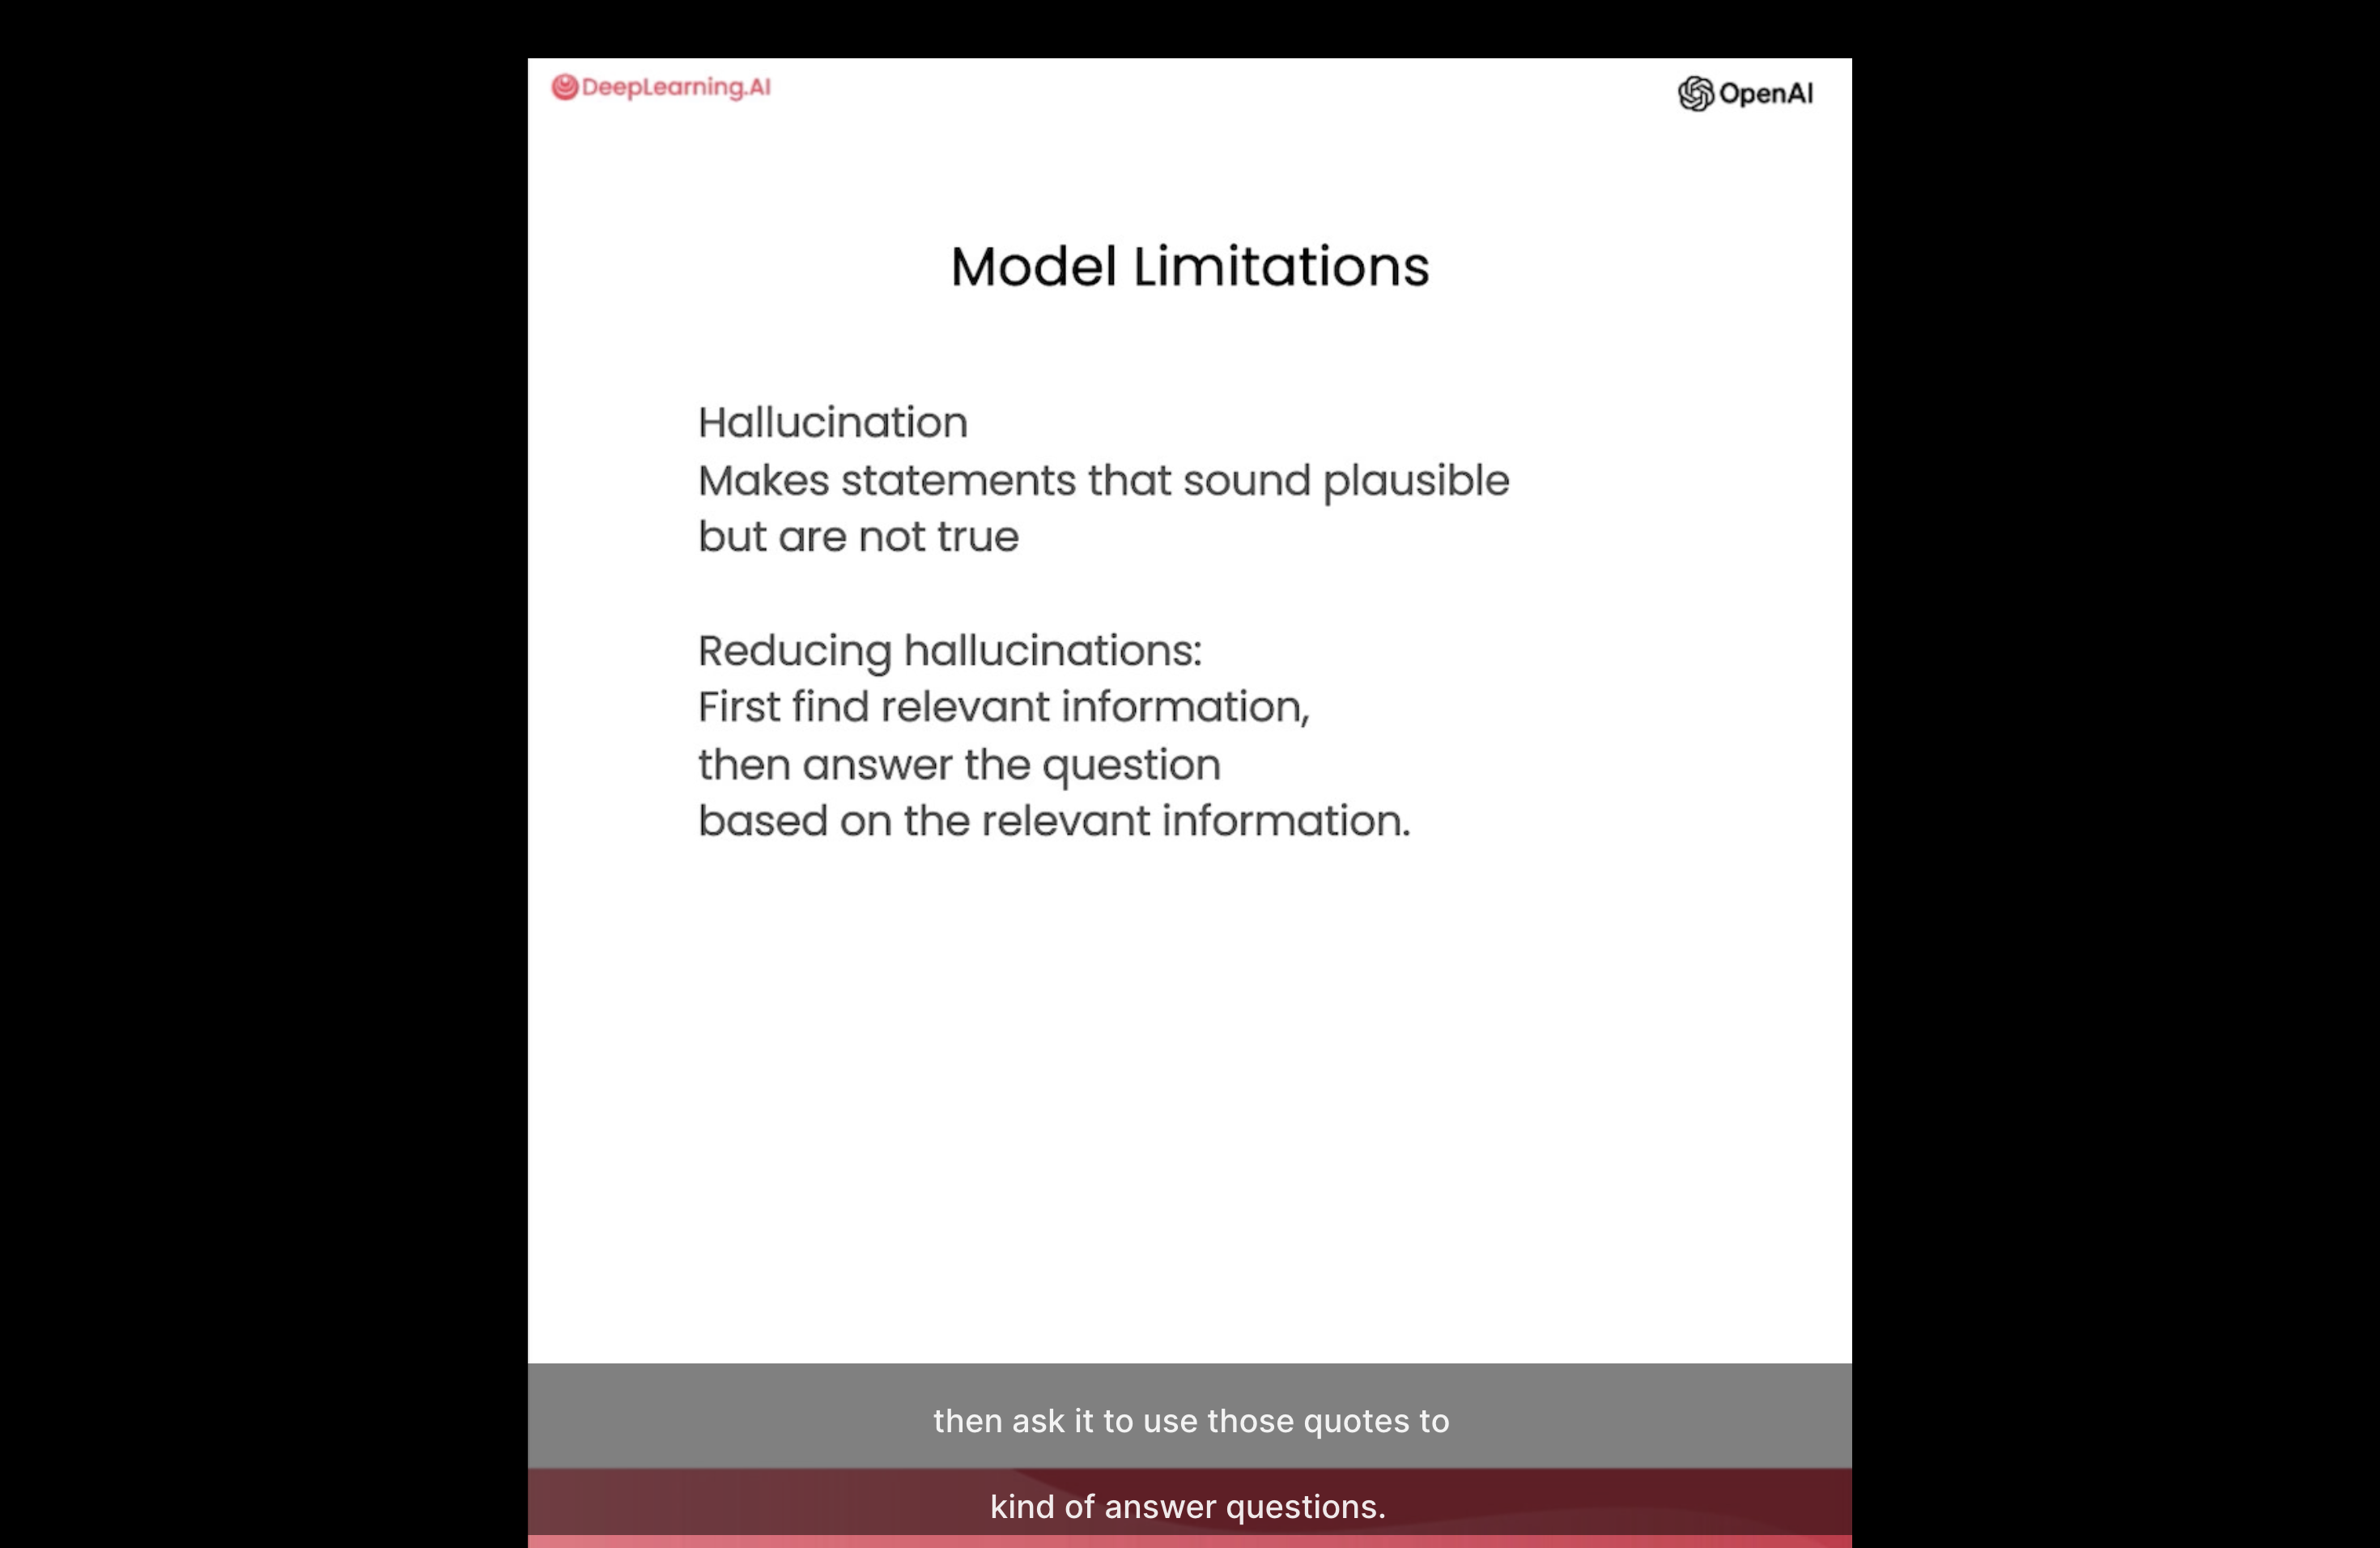

### Iterative Prompt Development 

Generate a marketing product description from a product fact sheet

In [1]:
fact_sheet_chair = """
OVERVIEW
- Part of a beautiful family of mid-century inspired office furniture, 
including filing cabinets, desks, bookcases, meeting tables, and more.
- Several options of shell color and base finishes.
- Available with plastic back and front upholstery (SWC-100) 
or full upholstery (SWC-110) in 10 fabric and 6 leather options.
- Base finish options are: stainless steel, matte black, 
gloss white, or chrome.
- Chair is available with or without armrests.
- Suitable for home or business settings.
- Qualified for contract use.

CONSTRUCTION
- 5-wheel plastic coated aluminum base.
- Pneumatic chair adjust for easy raise/lower action.

DIMENSIONS
- WIDTH 53 CM | 20.87”
- DEPTH 51 CM | 20.08”
- HEIGHT 80 CM | 31.50”
- SEAT HEIGHT 44 CM | 17.32”
- SEAT DEPTH 41 CM | 16.14”

OPTIONS
- Soft or hard-floor caster options.
- Two choices of seat foam densities: 
 medium (1.8 lb/ft3) or high (2.8 lb/ft3)
- Armless or 8 position PU armrests 

MATERIALS
SHELL BASE GLIDER
- Cast Aluminum with modified nylon PA6/PA66 coating.
- Shell thickness: 10 mm.
SEAT
- HD36 foam

COUNTRY OF ORIGIN
- Italy
"""

In [7]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Technical specifications: ```{fact_sheet_chair}```

"""
response = get_completion(prompt)
print(response)

Introducing our stunning mid-century inspired office chair, the perfect addition to any home or business setting. This chair is part of a beautiful family of office furniture, including filing cabinets, desks, bookcases, meeting tables, and more. 

With several options for shell color and base finishes, you can customize this chair to perfectly match your style and decor. Choose between plastic back and front upholstery or full upholstery in a variety of fabric and leather options. The base finish options include stainless steel, matte black, gloss white, or chrome. 

The chair is available with or without armrests, allowing you to choose the configuration that suits your needs. 

Constructed with a 5-wheel plastic coated aluminum base, this chair offers stability and mobility. The pneumatic chair adjust feature allows for easy raise and lower action, ensuring optimal comfort throughout the day. 

The dimensions of this chair are as follows: 
- Width: 53 cm | 20.87"
- Depth: 51 cm | 20

Issue 1: The text is too long 
- Limit the number of words/sentences/characters.

In [8]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Introducing our mid-century inspired office chair, part of a stunning furniture collection. With various color and finish options, choose between plastic or full upholstery in fabric or leather. The chair features a durable aluminum base with 5 wheels and pneumatic height adjustment. Perfect for home or business use. Made in Italy.


Issue 2. Text focuses on the wrong details

In [9]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Introducing our mid-century inspired office chair, part of a beautiful furniture collection. With various shell colors and base finishes, it offers versatility for any setting. Choose between plastic or full upholstery in a range of fabric and leather options. The chair features a durable aluminum base and pneumatic chair adjustment for easy height customization. Made in Italy.


In [10]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Introducing our mid-century inspired office chair, part of a beautiful family of furniture. This chair offers a range of options, including different shell colors and base finishes. Choose between plastic or full upholstery in various fabric and leather options. The chair is constructed with a 5-wheel plastic coated aluminum base and features a pneumatic chair adjust for easy raise/lower action. With its sleek design and multiple customization options, this chair is suitable for both home and business settings. Made in Italy.

Product IDs: SWC-100, SWC-110


Issue 3. Description needs a table of dimensions

In [11]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

After the description, include a table that gives the 
product's dimensions. The table should have two columns.
In the first column include the name of the dimension. 
In the second column include the measurements in inches only.

Give the table the title 'Product Dimensions'.

Format everything as HTML that can be used in a website. 
Place the description in a <div> element.

Technical specifications: ```{fact_sheet_chair}```
"""

response = get_completion(prompt)
print(response)

<div>
  <h2>Product Description</h2>
  <p>
    Introducing our latest addition to our mid-century inspired office furniture collection - the SWC Chair. This chair is part of a beautiful family of furniture that includes filing cabinets, desks, bookcases, meeting tables, and more. With its sleek design and customizable options, the SWC Chair is the perfect choice for any home or business setting.
  </p>
  <p>
    The SWC Chair is available in several options of shell color and base finishes, allowing you to create a look that matches your style. You can choose between plastic back and front upholstery or full upholstery in a variety of fabric and leather options. The base finish options include stainless steel, matte black, gloss white, or chrome. Additionally, you have the choice of having the chair with or without armrests.
  </p>
  <p>
    Constructed with durability in mind, the SWC Chair features a 5-wheel plastic coated aluminum base, ensuring stability and easy mobility. The chai

In [12]:
from IPython.display import display, HTML

In [13]:
display(HTML(response))

#### 4. Summarizing

In [3]:
prod_review = """
Got this panda plush toy for my daughter's birthday, \
who loves it and takes it everywhere. It's soft and \ 
super cute, and its face has a friendly look. It's \ 
a bit small for what I paid though. I think there \ 
might be other options that are bigger for the \ 
same price. It arrived a day earlier than expected, \ 
so I got to play with it myself before I gave it \ 
to her.
"""

Summarize with a word/sentence/character limi

In [4]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site. 

Summarize the review below, delimited by triple 
backticks, in at most 30 words. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

This panda plush toy is loved by the reviewer's daughter, but they feel it is a bit small for the price.


Summarize with a focus on shipping and delivery

In [6]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site to give feedback to the \
Shipping department. 

Summarize the review below, delimited by triple 
backticks, in at most 30 words, and focusing on any aspects \
that mention shipping and delivery of the product. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

The customer is happy with the product but suggests offering larger options for the same price. They were pleased with the early delivery.


Summarize with a focus on price and value

In [7]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site to give feedback to the \
pricing deparmtment, responsible for determining the \
price of the product.  

Summarize the review below, delimited by triple 
backticks, in at most 30 words, and focusing on any aspects \
that are relevant to the price and perceived value. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

The customer loves the panda plush toy for its softness and cuteness, but feels it is overpriced compared to other options available.


Summaries include topics that are not related to the topic of focus.

In [8]:
prompt = f"""
Your task is to extract relevant information from \ 
a product review from an ecommerce site to give \
feedback to the Shipping department. 

From the review below, delimited by triple quotes \
extract the information relevant to shipping and \ 
delivery. Limit to 30 words. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

The shipping department should take note that the product arrived a day earlier than expected.


Summarize multiple product reviews¶

In [9]:

review_1 = prod_review 

# review for a standing lamp
review_2 = """
Needed a nice lamp for my bedroom, and this one \
had additional storage and not too high of a price \
point. Got it fast - arrived in 2 days. The string \
to the lamp broke during the transit and the company \
happily sent over a new one. Came within a few days \
as well. It was easy to put together. Then I had a \
missing part, so I contacted their support and they \
very quickly got me the missing piece! Seems to me \
to be a great company that cares about their customers \
and products. 
"""

# review for an electric toothbrush
review_3 = """
My dental hygienist recommended an electric toothbrush, \
which is why I got this. The battery life seems to be \
pretty impressive so far. After initial charging and \
leaving the charger plugged in for the first week to \
condition the battery, I've unplugged the charger and \
been using it for twice daily brushing for the last \
3 weeks all on the same charge. But the toothbrush head \
is too small. I’ve seen baby toothbrushes bigger than \
this one. I wish the head was bigger with different \
length bristles to get between teeth better because \
this one doesn’t.  Overall if you can get this one \
around the $50 mark, it's a good deal. The manufactuer's \
replacements heads are pretty expensive, but you can \
get generic ones that're more reasonably priced. This \
toothbrush makes me feel like I've been to the dentist \
every day. My teeth feel sparkly clean! 
"""

# review for a blender
review_4 = """
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \ 
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \ 
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \ 
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""

reviews = [review_1, review_2, review_3, review_4]



In [13]:
for i in range(len(reviews)):
    prompt = f"""
    Your task is to generate a short summary of a product \ 
    review from an ecommerce site. 

    Summarize the review below, delimited by triple \
    backticks in at most 20 words. 

    Review: ```{reviews[i]}```
    """

    response = get_completion(prompt)
    print(i, response, "\n")


0 Soft and cute panda plush toy loved by daughter, but a bit small for the price. Arrived early. 



RateLimitError: Rate limit reached for gpt-3.5-turbo in organization org-LUDHtprj8OJ75TBCB59P7iIu on requests per min (RPM): Limit 3, Used 3, Requested 1. Please try again in 20s. Visit https://platform.openai.com/account/rate-limits to learn more. You can increase your rate limit by adding a payment method to your account at https://platform.openai.com/account/billing.

### Inferring 

Which Product Review has Positive or Negative sentiment , Extracting Names etc

Product review text

In [14]:
lamp_review = """
Needed a nice lamp for my bedroom, and this one had \
additional storage and not too high of a price point. \
Got it fast.  The string to our lamp broke during the \
transit and the company happily sent over a new one. \
Came within a few days as well. It was easy to put \
together.  I had a missing part, so I contacted their \
support and they very quickly got me the missing piece! \
Lumina seems to me to be a great company that cares \
about their customers and products!!
"""

Sentiment (positive/negative)

In [15]:
prompt = f"""
What is the sentiment of the following product review, 
which is delimited with triple backticks?

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

The sentiment of the product review is positive.


In [16]:
prompt = f"""
What is the sentiment of the following product review, 
which is delimited with triple backticks?

Give your answer as a single word, either "positive" \
or "negative".

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

positive


Identify types of emotions

In [17]:
prompt = f"""
Identify a list of emotions that the writer of the \
following review is expressing. Include no more than \
five items in the list. Format your answer as a list of \
lower-case words separated by commas.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

satisfied, grateful, impressed, pleased, happy


Identify Anger

In [18]:
prompt = f"""
Is the writer of the following review expressing anger?\
The review is delimited with triple backticks. \
Give your answer as either yes or no.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

No


This would take alot amount of time . If we have to buid this through Supervised Machine learning Approach 

Extract product and company name from customer reviews

Information Extraction

In [19]:
prompt = f"""
Identify the following items from the review text: 
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. \
Format your response as a JSON object with \
"Item" and "Brand" as the keys. 
If the information isn't present, use "unknown" \
as the value.
Make your response as short as possible.
  
Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

{
  "Item": "lamp",
  "Brand": "Lumina"
}


Doing multiple tasks at once

In [20]:
prompt = f"""
Identify the following items from the review text: 
- Sentiment (positive or negative)
- Is the reviewer expressing anger? (true or false)
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. \
Format your response as a JSON object with \
"Sentiment", "Anger", "Item" and "Brand" as the keys.
If the information isn't present, use "unknown" \
as the value.
Make your response as short as possible.
Format the Anger value as a boolean.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

{
  "Sentiment": "positive",
  "Anger": false,
  "Item": "lamp",
  "Brand": "Lumina"
}


Inferring topics

Article about How government works feel about agency they work for .

In [21]:
story = """
In a recent survey conducted by the government, 
public sector employees were asked to rate their level 
of satisfaction with the department they work at. 
The results revealed that NASA was the most popular 
department with a satisfaction rating of 95%.

One NASA employee, John Smith, commented on the findings, 
stating, "I'm not surprised that NASA came out on top. 
It's a great place to work with amazing people and 
incredible opportunities. I'm proud to be a part of 
such an innovative organization."

The results were also welcomed by NASA's management team, 
with Director Tom Johnson stating, "We are thrilled to 
hear that our employees are satisfied with their work at NASA. 
We have a talented and dedicated team who work tirelessly 
to achieve our goals, and it's fantastic to see that their 
hard work is paying off."

The survey also revealed that the 
Social Security Administration had the lowest satisfaction 
rating, with only 45% of employees indicating they were 
satisfied with their job. The government has pledged to 
address the concerns raised by employees in the survey and 
work towards improving job satisfaction across all departments.
"""

Inferring 5 Topics

In [22]:
prompt = f"""
Determine five topics that are being discussed in the \
following text, which is delimited by triple backticks.

Make each item one or two words long. 

Format your response as a list of items separated by commas.

Text sample: '''{story}'''
"""
response = get_completion(prompt)
print(response)

1. Government survey
2. Department satisfaction rating
3. NASA
4. Social Security Administration
5. Job satisfaction improvement


In [23]:
response.split(sep=',')

['1. Government survey\n2. Department satisfaction rating\n3. NASA\n4. Social Security Administration\n5. Job satisfaction improvement']

Identify whether topics are available in above story

In [24]:
topic_list = [
    "nasa", "local government", "engineering", 
    "employee satisfaction", "federal government"
]
prompt = f"""
Determine whether each item in the following list of \
topics is a topic in the text below, which
is delimited with triple backticks.

Give your answer as list with 0 or 1 for each topic.\

List of topics: {", ".join(topic_list)}

Text sample: '''{story}'''
"""
response = get_completion(prompt)
print(response)

[1, 0, 0, 1, 1]


Transforming or Translating 

In [26]:
prompt = f"""
Translate the following English text to Spanish: \ 
```Hi, I would like to order a blender```
"""
response = get_completion(prompt)
print(response)

Hola, me gustaría ordenar una licuadora.


In [27]:
prompt = f"""
Tell me which language this is: 
```Combien coûte le lampadaire?```
"""
response = get_completion(prompt)
print(response)

This language is French.


In [28]:
prompt = f"""
Translate the following  text to French and Spanish
and English pirate: \
```I want to order a basketball```
"""
response = get_completion(prompt)
print(response)

French: ```Je veux commander un ballon de basket```
Spanish: ```Quiero ordenar una pelota de baloncesto```
English: ```I want to order a basketball```


In [29]:
prompt = f"""
Translate the following text to Spanish in both the \
formal and informal forms: 
'Would you like to order a pillow?'
"""
response = get_completion(prompt)
print(response)

Formal: ¿Le gustaría ordenar una almohada?
Informal: ¿Te gustaría ordenar una almohada?


Universal Translator
Imagine you are in charge of IT at a large multinational e-commerce company. Users are messaging you with IT issues in all their native languages. Your staff is from all over the world and speaks only their native languages. You need a universal translator!

In [30]:
user_messages = [
  "La performance du système est plus lente que d'habitude.",  # System performance is slower than normal         
  "Mi monitor tiene píxeles que no se iluminan.",              # My monitor has pixels that are not lighting                                             # My screen is flashing
] 

In [33]:
for issue in user_messages:
    prompt = f"Tell me what language this is: ```{issue}```"
    lang = get_completion(prompt)
    print(f"Original message ({lang}): {issue}")

    prompt = f"""
    Translate the following  text to English \
    and Korean: ```{issue}```
    """
    response = get_completion(prompt)

    print(response, "\n")
    

Original message (The language is French.): La performance du système est plus lente que d'habitude.
The performance of the system is slower than usual.

시스템의 성능이 평소보다 느립니다. 



RateLimitError: Rate limit reached for gpt-3.5-turbo in organization org-LUDHtprj8OJ75TBCB59P7iIu on requests per min (RPM): Limit 3, Used 3, Requested 1. Please try again in 20s. Visit https://platform.openai.com/account/rate-limits to learn more. You can increase your rate limit by adding a payment method to your account at https://platform.openai.com/account/billing.

Tone Transformation

In [34]:
prompt = f"""
Translate the following from slang to a business letter: 
'Dude, This is Joe, check out this spec on this standing lamp.'
"""
response = get_completion(prompt)
print(response)

Dear Sir/Madam,

I hope this letter finds you well. My name is Joe, and I am writing to bring your attention to a specification document regarding a standing lamp. 

I kindly request that you take a moment to review the attached document, as it provides detailed information about the features and specifications of the aforementioned standing lamp. 

Thank you for your time and consideration. I look forward to discussing this further with you.

Yours sincerely,
Joe


Format Conversion

In [36]:
data_json = { "resturant employees" :[ 
    {"name":"Shyam", "email":"shyamjaiswal@gmail.com"},
    {"name":"Bob", "email":"bob32@gmail.com"},
    {"name":"Jai", "email":"jai87@gmail.com"}
]}

prompt = f"""
Translate the following python dictionary from JSON to an HTML \
table with column headers and title: {data_json}
"""
response = get_completion(prompt)
print(response)

<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<h2>Restaurant Employees</h2>

<table>
  <tr>
    <th>Name</th>
    <th>Email</th>
  </tr>
  <tr>
    <td>Shyam</td>
    <td>shyamjaiswal@gmail.com</td>
  </tr>
  <tr>
    <td>Bob</td>
    <td>bob32@gmail.com</td>
  </tr>
  <tr>
    <td>Jai</td>
    <td>jai87@gmail.com</td>
  </tr>
</table>

</body>
</html>


In [37]:
from IPython.display import display, Markdown, Latex, HTML, JSON
display(HTML(response))

Spellcheck/Grammar check.

Here are some examples of common grammar and spelling problems and the LLM's response.

To signal to the LLM that you want it to proofread your text, you instruct the model to 'proofread' or 'proofread and correct'.

In [41]:
text = [ 
  "Its going to be a long day. Does the car need it’s oil changed?",  # Homonyms
  "This phrase is to cherck chatGPT for speling abilitty"  # spelling
]
for t in text:
    prompt = f"""Proofread and correct the following text
    and rewrite the corrected version. If you don't find
    and errors, just say "No errors found". Don't use 
    any punctuation around the text:
    ```{t}```"""
    response = get_completion(prompt)
    print(response)

It's going to be a long day. Does the car need its oil changed?
This phrase is to check chatGPT for spelling ability.


In [42]:
text = f"""
Got this for my daughter for her birthday cuz she keeps taking \
mine from my room.  Yes, adults also like pandas too.  She takes \
it everywhere with her, and it's super soft and cute.  One of the \
ears is a bit lower than the other, and I don't think that was \
designed to be asymmetrical. It's a bit small for what I paid for it \
though. I think there might be other options that are bigger for \
the same price.  It arrived a day earlier than expected, so I got \
to play with it myself before I gave it to my daughter.
"""
prompt = f"proofread and correct this review: ```{text}```"
response = get_completion(prompt)
print(response)

Got this for my daughter for her birthday because she keeps taking mine from my room. Yes, adults also like pandas too. She takes it everywhere with her, and it's super soft and cute. However, one of the ears is a bit lower than the other, and I don't think that was designed to be asymmetrical. Additionally, it's a bit small for what I paid for it. I believe there might be other options that are bigger for the same price. On the positive side, it arrived a day earlier than expected, so I got to play with it myself before I gave it to my daughter.


In [44]:
from redlines import Redlines

diff = Redlines(text,response)
display(Markdown(diff.output_markdown))

Got this for my daughter for her birthday <span style='color:red;font-weight:700;text-decoration:line-through;'>cuz </span><span style='color:green;font-weight:700;'>because </span>she keeps taking mine from my <span style='color:red;font-weight:700;text-decoration:line-through;'>room.  </span><span style='color:green;font-weight:700;'>room. </span>Yes, adults also like pandas <span style='color:red;font-weight:700;text-decoration:line-through;'>too.  </span><span style='color:green;font-weight:700;'>too. </span>She takes it everywhere with her, and it's super soft and <span style='color:red;font-weight:700;text-decoration:line-through;'>cute.  One </span><span style='color:green;font-weight:700;'>cute. However, one </span>of the ears is a bit lower than the other, and I don't think that was designed to be asymmetrical. <span style='color:red;font-weight:700;text-decoration:line-through;'>It's </span><span style='color:green;font-weight:700;'>Additionally, it's </span>a bit small for what I paid for <span style='color:red;font-weight:700;text-decoration:line-through;'>it though. </span><span style='color:green;font-weight:700;'>it. </span>I <span style='color:red;font-weight:700;text-decoration:line-through;'>think </span><span style='color:green;font-weight:700;'>believe </span>there might be other options that are bigger for the same <span style='color:red;font-weight:700;text-decoration:line-through;'>price.  It </span><span style='color:green;font-weight:700;'>price. On the positive side, it </span>arrived a day earlier than expected, so I got to play with it myself before I gave it to my daughter.

In [45]:
prompt = f"""
proofread and correct this review. Make it more compelling. 
Ensure it follows APA style guide and targets an advanced reader. 
Output in markdown format.
Text: ```{text}```
"""
response = get_completion(prompt)
display(Markdown(response))

**Review of the Panda Plush Toy: A Perfect Gift for All Ages**

I purchased this adorable panda plush toy as a birthday gift for my daughter, who has a penchant for sneaking into my room and taking mine. It's worth noting that pandas are not just for children; even adults can appreciate their charm. 

From the moment my daughter unwrapped this gift, she has been inseparable from it. The plush toy's irresistibly soft and cuddly texture makes it the perfect companion for her daily adventures. However, I did notice a minor flaw in its design - one of the ears is slightly lower than the other, which seems unintentional. 

While the quality of the toy is undeniably impressive, I must admit that I expected it to be slightly larger considering its price. It would be worthwhile to explore other options that offer a larger size for the same cost. 

On a positive note, the delivery of the panda plush toy exceeded my expectations. It arrived a day earlier than anticipated, allowing me to indulge in some playtime with it before presenting it to my daughter. 

In conclusion, the panda plush toy is a delightful gift that transcends age boundaries. Its exceptional softness and undeniable cuteness make it an instant favorite. Although there are minor design flaws and potential alternatives to consider, the early delivery and overall satisfaction with the product make it a worthwhile purchase.

### Expanding

Taking shorter text such as instructions or list of topics and generate longer piece of text such as email or essay


In this lesson, you will generate customer service emails that are tailored to each customer's review.

Customize the automated reply to a customer email

In [46]:
# given the sentiment from the lesson on "inferring",
# and the original customer message, customize the email
sentiment = "negative"

# review for a blender
review = f"""
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \ 
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \ 
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \ 
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""

In [47]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt)
print(response)

Dear Valued Customer,

Thank you for taking the time to share your review with us. We appreciate your feedback and apologize for any inconvenience you may have experienced.

We are sorry to hear about the price increase you noticed in December. We strive to provide competitive pricing for our products, and we understand your frustration. If you have any further concerns regarding pricing, we recommend reaching out to our customer service team who will be happy to assist you.

We also appreciate your feedback regarding the base of the system. We continuously work to improve the quality of our products, and your comments will be taken into consideration for future enhancements.

Regarding the motor issue you encountered, we apologize for any inconvenience caused. Our customer service team is available to assist you with any technical difficulties you may encounter, even if the warranty has expired. Please do not hesitate to reach out to them for further assistance.

Thank you once again 

Remind the model to use details from the customer's email

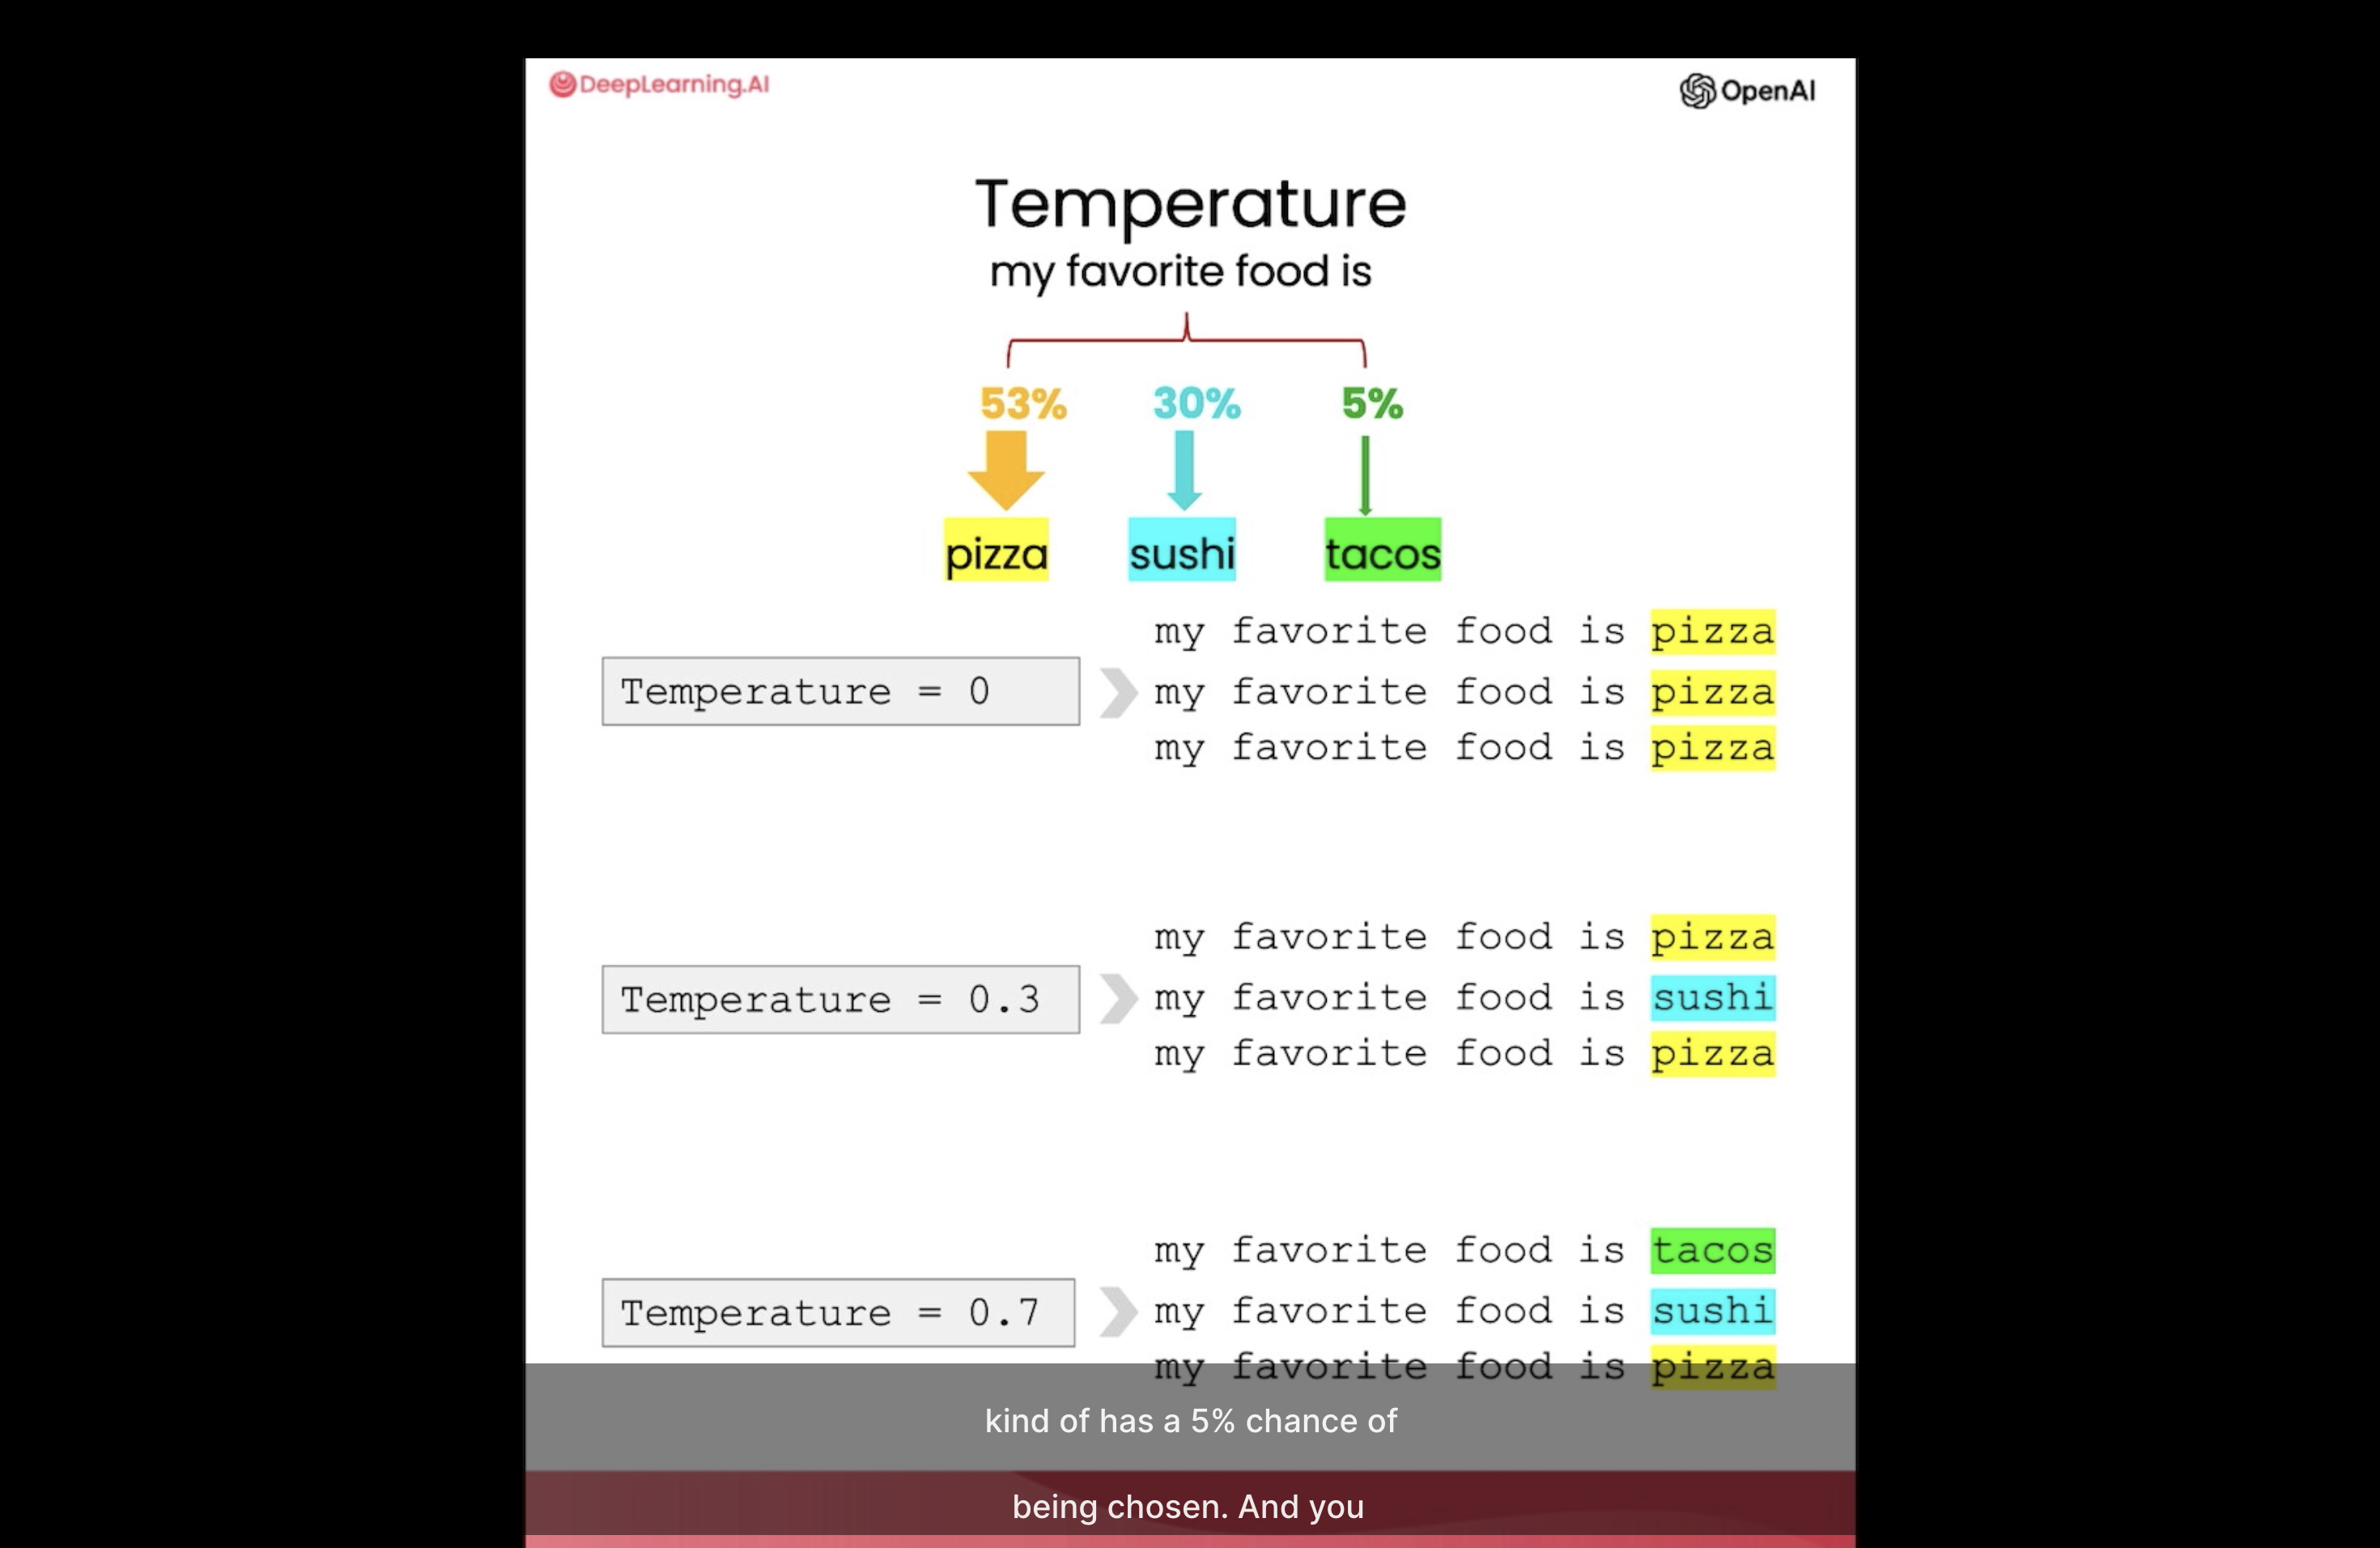

In [49]:
def get_completion_t(prompt, model="gpt-3.5-turbo",temperature=0): # Andrew mentioned that the prompt/ completion paradigm is preferable for this class
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion_t(prompt, temperature=0.7)
print(response)

Dear Valued Customer,

Thank you for taking the time to share your review with us. We appreciate your feedback and are sorry to hear about your experience with the pricing and quality of our 17 piece system.

We apologize for any confusion regarding the pricing changes. Our prices are subject to change based on various factors, including market demand and availability. However, we understand your frustration and apologize for any inconvenience this may have caused.

Regarding the decrease in quality, we are constantly striving to improve our products based on customer feedback. We appreciate your specific observations about the base of the system and will take them into consideration during our product development process.

If you have any further concerns or questions, we encourage you to reach out to our customer service team. They will be more than happy to assist you and address any issues you may have.

Thank you once again for your valuable feedback. We truly appreciate your supp